DEMO NOTEBOOK FOR TESTING MODULES

In [7]:
from eda import sum, plot_distributions, cor_heatmap, scatter_plot
from loader import load
from algo import svc
from algo_rfm import random_forest_model, tune_random_forest
from preprocessing import preprocess, handle_missing_values, scale_features, remove_outliers
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
data = load("data/forestfires.csv")

# Preprocess categorical variables
data = preprocess(data)

# Handle missing values
data = handle_missing_values(data)

# Scale specific features
features_to_scale = ['temp', 'RH', 'wind', 'rain']
data = scale_features(data, features_to_scale)

# Adjust the scale of 'area'
data['area'] = data['area'] 

# Display processed data
print(data.head(140))
print(data.info())

Data load completed!
     X  Y  month  day  FFMC    DMC     DC   ISI      temp        RH      wind  \
0    7  5      3    5  86.2   26.2   94.3   5.1  0.192926  0.423529  0.700000   
1    7  4     10    2  90.6   35.4  669.1   6.7  0.508039  0.211765  0.055556   
2    7  4     10    6  90.6   43.7  686.9   6.7  0.398714  0.211765  0.100000   
3    8  6      3    5  91.7   33.3   77.5   9.0  0.196141  0.964706  0.400000   
4    8  6      3    7  89.3   51.3  102.2   9.6  0.295820  0.988235  0.155556   
..  .. ..    ...  ...   ...    ...    ...   ...       ...       ...       ...   
135  3  5      8    6  93.5  139.4  594.2  20.3  0.495177  0.435294  0.600000   
136  3  6      9    7  92.4  124.1  680.7   8.5  0.482315  0.505882  0.100000   
137  3  6      9    1  90.9  126.5  686.5   7.0  0.430868  0.600000  0.300000   
138  9  9      7    2  85.8   48.3  313.4   3.9  0.508039  0.317647  0.255556   
139  1  4      9    2  91.0  129.5  692.6   7.0  0.627010  0.270588  0.200000   

      

In [3]:
# fire occured labeling and updating data. So that it is a binary classification issue
data['fire_occurred'] = (data['area'] > 0).astype(int)

data['tempwind'] = data['temp'] * data['wind']

X = data.drop(columns=['fire_occurred', 'area'])
y = data['fire_occurred']
data.head(517)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire_occurred,tempwind
0,7,5,3,5,86.2,26.2,94.3,5.1,0.192926,0.423529,0.700000,0.00000,0.00,0,0.135048
1,7,4,10,2,90.6,35.4,669.1,6.7,0.508039,0.211765,0.055556,0.00000,0.00,0,0.028224
2,7,4,10,6,90.6,43.7,686.9,6.7,0.398714,0.211765,0.100000,0.00000,0.00,0,0.039871
3,8,6,3,5,91.7,33.3,77.5,9.0,0.196141,0.964706,0.400000,0.03125,0.00,0,0.078457
4,8,6,3,7,89.3,51.3,102.2,9.6,0.295820,0.988235,0.155556,0.00000,0.00,0,0.046016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,0.823151,0.200000,0.255556,0.00000,6.44,1,0.210361
513,2,4,8,7,81.6,56.7,665.6,1.9,0.633441,0.658824,0.600000,0.00000,54.29,1,0.380064
514,7,4,8,7,81.6,56.7,665.6,1.9,0.610932,0.647059,0.700000,0.00000,11.16,1,0.427653
515,1,4,8,6,94.4,146.0,614.7,11.3,0.752412,0.317647,0.400000,0.00000,0.00,0,0.300965


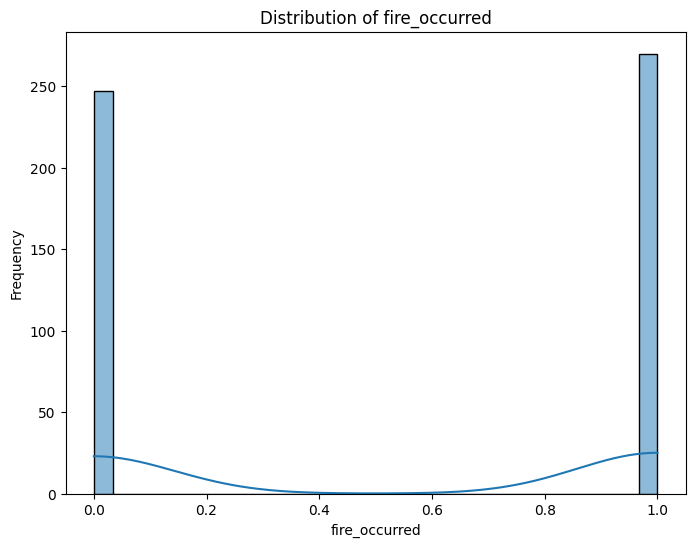

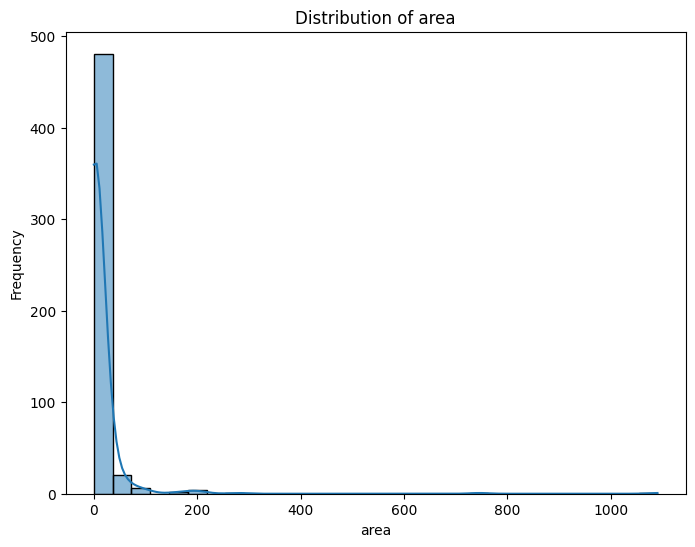

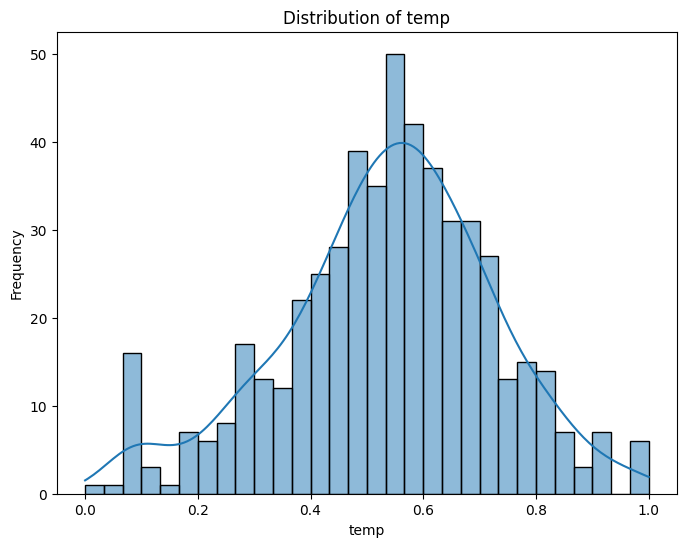

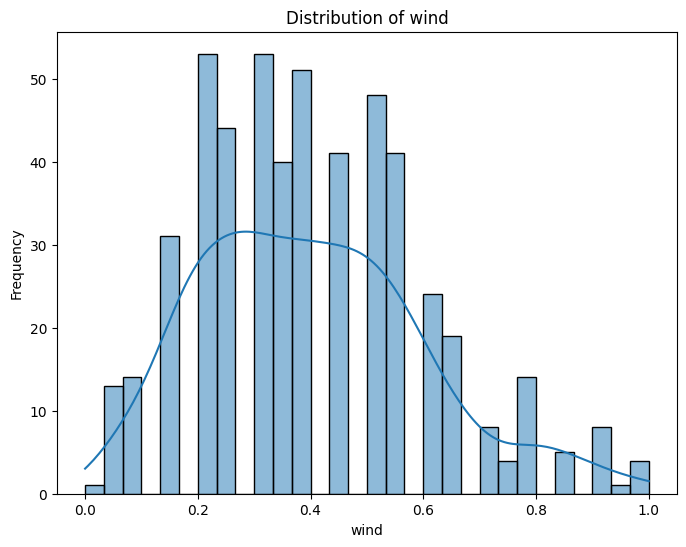

Wind has this weird pattern of higher bars no bars etc. 
 I guess this is because wind tends to be 
registered as 5 or 6 and less likely as 5.5


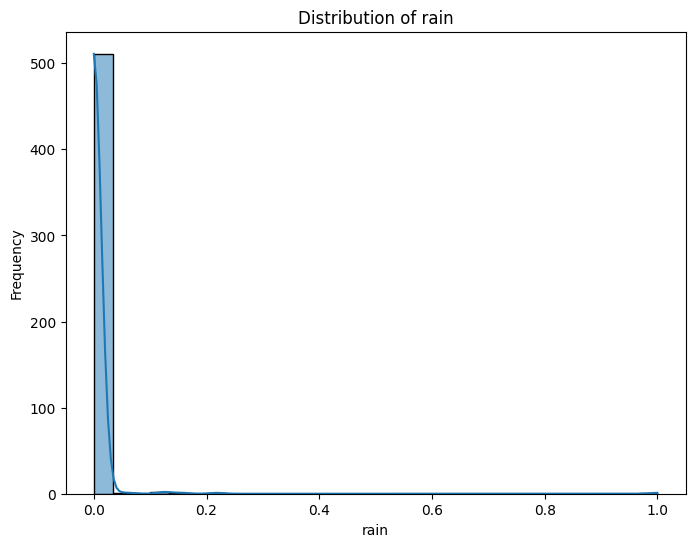

In [4]:
plot_distributions(data, 'fire_occurred')
plot_distributions(data, 'area')
plot_distributions(data,'temp')
plot_distributions(data,'wind')
print("Wind has this weird pattern of higher bars no bars etc. \n I guess this is because wind tends to be \nregistered as 5 or 6 and less likely as 5.5")
plot_distributions(data,'rain')


In [11]:
X = data.drop(columns=['area'])
y = data['fire_occurred']

# Run SVR
svc_results = svc(X, y)
print(f"MSE: {svc_results['accuracy']}, report: {svc_results['report']}")

MSE: 0.9903846153846154, report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        53

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



Performance satisfactory!